In [93]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.svm import SVR
from sklearn.cross_decomposition import PLSRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso

In [94]:
# Загрузка данных
data = pd.read_csv('DataSet1_3.csv')
data['Date'] = pd.to_datetime(data['Date'])  # Преобразуем столбец 'Date' в формат datetime
# Преобразование даты в секунды
data['Timestamp'] = data['Date'].apply(lambda x: int(x.timestamp()))
data['Timestamp'] = data['Timestamp'].astype(float)

data.head()

,Date,Open,High,Low,Close,Volume,Name,Timestamp
0,2006-01-03,211.47,218.05,209.32,217.83,13137450,GOOGL,1.136246e+09
1,2006-01-04,222.17,224.70,220.09,222.84,15292353,GOOGL,1.136333e+09
2,2006-01-05,223.22,226.00,220.97,225.85,10815661,GOOGL,1.136419e+09
3,2006-01-06,228.66,235.49,226.85,233.06,17759521,GOOGL,1.136506e+09
4,2006-01-09,233.44,236.94,230.70,233.68,12795837,GOOGL,1.136765e+09


Задание
----
![Alt text](Task.jpg)

Добавление лагов целевого параметра (отставание на один шаг)
---

In [95]:
# Создаем столбец с лагами
lag = 1  # Количество лагов (отставаний)
data['Close_Lag'] = data['Close'].shift(lag)

# Удаляем строки с NaN значениями
data = data.dropna()

Разделение на выборки
---

        Date    Open    High     Low   Close    Volume   Name     Timestamp  \
1 2006-01-04  222.17  224.70  220.09  222.84  15292353  GOOGL  1.136333e+09   
2 2006-01-05  223.22  226.00  220.97  225.85  10815661  GOOGL  1.136419e+09   
3 2006-01-06  228.66  235.49  226.85  233.06  17759521  GOOGL  1.136506e+09   
4 2006-01-09  233.44  236.94  230.70  233.68  12795837  GOOGL  1.136765e+09   
5 2006-01-10  232.44  235.36  231.25  235.11   9104719  GOOGL  1.136851e+09   

   Close_Lag  
1     217.83  
2     222.84  
3     225.85  
4     233.06  
5     233.68  
          Date    Open    High     Low   Close   Volume   Name     Timestamp  \
121 2006-06-27  203.06  204.20  200.71  201.36  4107079  GOOGL  1.151366e+09   
122 2006-06-28  202.21  203.44  200.77  203.26  3712699  GOOGL  1.151453e+09   
123 2006-06-29  204.20  209.31  203.11  209.11  6662215  GOOGL  1.151539e+09   
124 2006-06-30  208.01  209.87  206.37  209.87  6298846  GOOGL  1.151626e+09   
125 2006-07-03  210.23  212.10  209

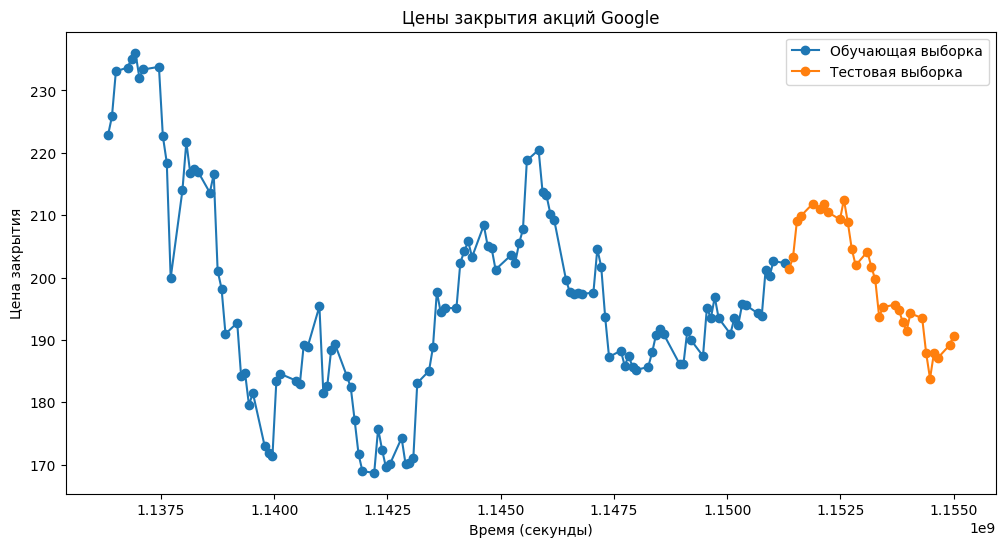

In [96]:
# Берем первые 150 значений
data = data.head(150)

# Разделение данных на тренировочную (80%) и тестовую (20%) выборки
train_size = int(len(data) * 0.8)
train_data = data[:train_size]
test_data = data[train_size:]

# Вывод первых нескольких строк данных
print(train_data.head())
print(test_data.head())

# Извлечение признаков и целевой переменной из обучающих данных
X_train = train_data[['Open', 'High', 'Low', 'Volume', 'Close_Lag']]
y_train = train_data['Close']

# Извлечение признаков и целевой переменной из тестовых данных
X_test = test_data[['Open', 'High', 'Low', 'Volume', 'Close_Lag']]
y_test = test_data['Close']

# Визуализация данных
plt.figure(figsize=(12, 6))
plt.plot(train_data['Timestamp'], train_data['Close'], label='Обучающая выборка', marker='o')
plt.plot(test_data['Timestamp'], test_data['Close'], label='Тестовая выборка', marker='o')
plt.xlabel('Время (секунды)')
plt.ylabel('Цена закрытия')
plt.legend()
plt.title('Цены закрытия акций Google')
plt.show()

Метод МНК (квадратичная гипотеза)
---

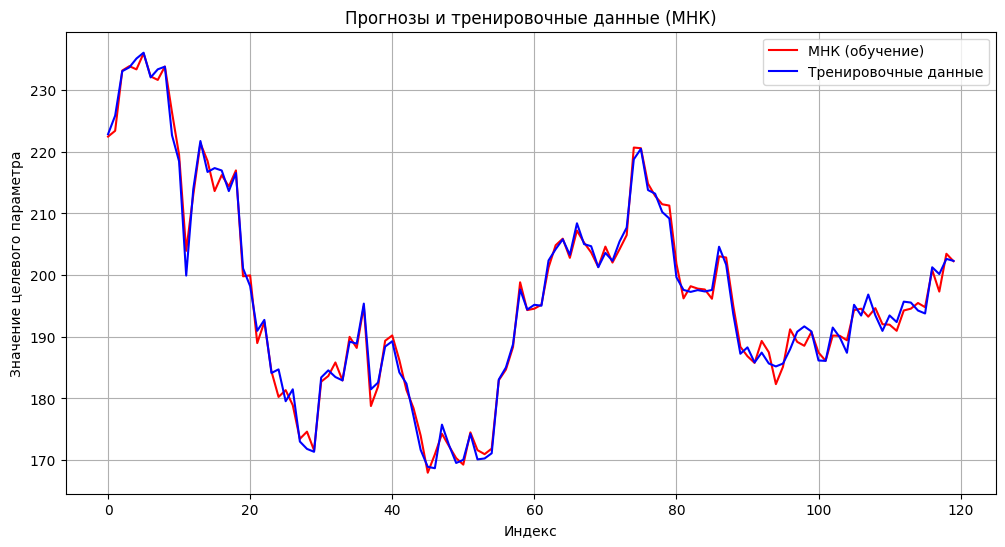

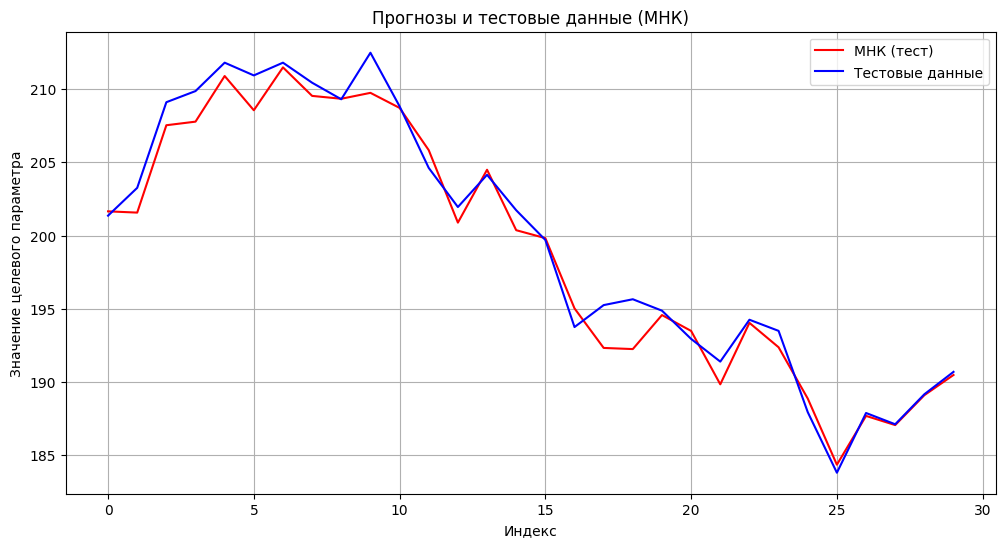

RMSE МНК: 1.37


In [97]:
# Метод МНК (квадратичная гипотеза)
lr = LinearRegression()
lr.fit(X_train, y_train)
y_lr_train = lr.predict(X_train)
y_lr_test = lr.predict(X_test)

# Построение графиков для МНК
plt.figure(figsize=(12, 6))
plt.plot(y_lr_train, label='МНК (обучение)', color='red')
plt.plot(range(len(y_train)), y_train, label='Тренировочные данные', color='blue')
plt.xlabel('Индекс')
plt.ylabel('Значение целевого параметра')
plt.legend()
plt.title('Прогнозы и тренировочные данные (МНК)')
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(y_lr_test, label='МНК (тест)', color='red')
plt.plot(range(len(y_test)), y_test, label='Тестовые данные', color='blue')
plt.xlabel('Индекс')
plt.ylabel('Значение целевого параметра')
plt.legend()
plt.title('Прогнозы и тестовые данные (МНК)')
plt.grid(True)
plt.show()

# Расчет RMSE для МНК
rmse_lr = np.sqrt(mean_squared_error(y_test, y_lr_test))
print(f'RMSE МНК: {rmse_lr:.2f}')

RMSE на обучающей выборке: 1.27
RMSE на тестовой выборке: 1.39


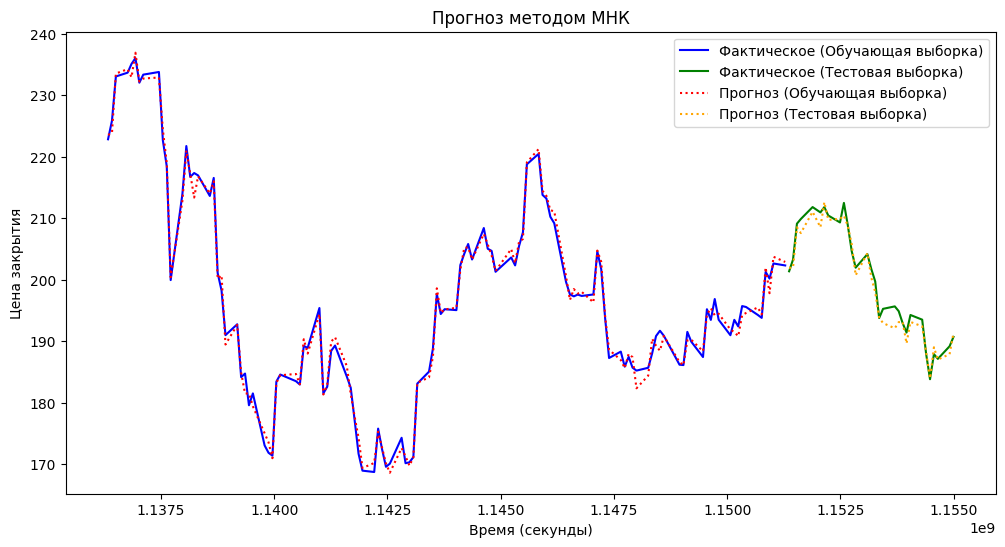

In [98]:
# Создание квадратичных признаков
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Создание и обучение модели линейной регрессии
model = LinearRegression()
model.fit(X_train_poly, y_train)

# Прогноз на обучающих и тестовых данных
y_train_pred = model.predict(X_train_poly)
y_test_pred = model.predict(X_test_poly)

# Подсчет RMSE
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

# Вывод RMSE
print(f'RMSE на обучающей выборке: {rmse_train:.2f}')
print(f'RMSE на тестовой выборке: {rmse_test:.2f}')

# График прогнозов и фактических значений
plt.figure(figsize=(12, 6))
plt.plot(train_data['Timestamp'], y_train, label='Фактическое (Обучающая выборка)', color='blue')
plt.plot(test_data['Timestamp'], y_test, label='Фактическое (Тестовая выборка)', color='green')
plt.plot(train_data['Timestamp'], y_train_pred, label='Прогноз (Обучающая выборка)', color='red', linestyle='dotted')
plt.plot(test_data['Timestamp'], y_test_pred, label='Прогноз (Тестовая выборка)', color='orange', linestyle='dotted')
plt.xlabel('Время (секунды)')
plt.ylabel('Цена закрытия')
plt.legend()
plt.title('Прогноз методом МНК')
plt.show()

Метод SVM (Support Vector Machine)
---

RMSE на обучающей выборке: 1.53
RMSE на тестовой выборке: 1.43


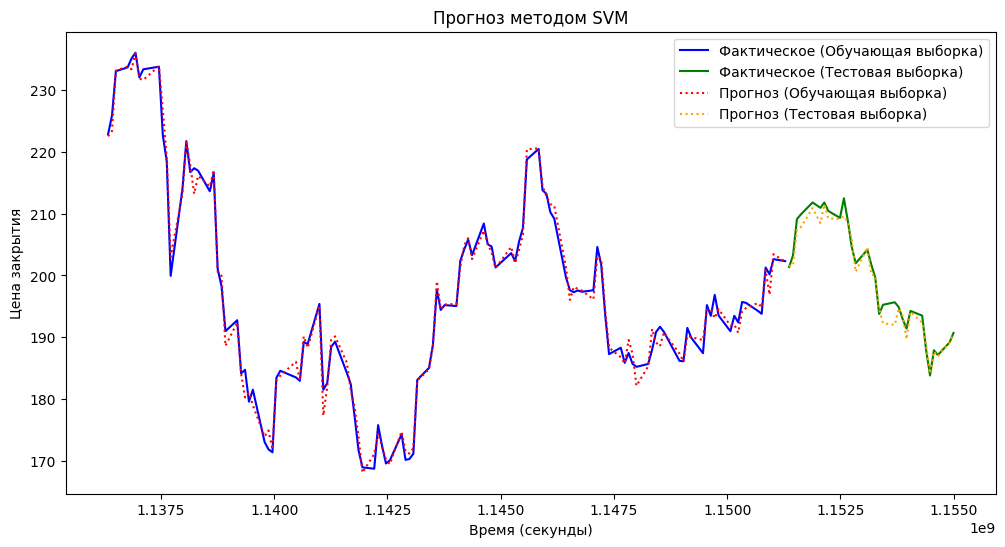

In [99]:
# Создание и обучение модели SVR
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

svr = SVR(kernel='linear', degree=2, C=100, epsilon=0.1)
svr.fit(X_train_scaled, y_train)

# Прогноз на обучающих и тестовых данных
y_train_pred = svr.predict(X_train_scaled)
y_test_pred = svr.predict(X_test_scaled)

# Подсчет RMSE
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

# Вывод RMSE
print(f'RMSE на обучающей выборке: {rmse_train:.2f}')
print(f'RMSE на тестовой выборке: {rmse_test:.2f}')

# График прогнозов и фактических значений
plt.figure(figsize=(12, 6))
plt.plot(train_data['Timestamp'], y_train, label='Фактическое (Обучающая выборка)', color='blue')
plt.plot(test_data['Timestamp'], y_test, label='Фактическое (Тестовая выборка)', color='green')
plt.plot(train_data['Timestamp'], y_train_pred, label='Прогноз (Обучающая выборка)', color='red', linestyle='dotted')
plt.plot(test_data['Timestamp'], y_test_pred, label='Прогноз (Тестовая выборка)', color='orange', linestyle='dotted')
plt.xlabel('Время (секунды)')
plt.ylabel('Цена закрытия')
plt.legend()
plt.title('Прогноз методом SVM')
plt.show()

Метод Lasso
---

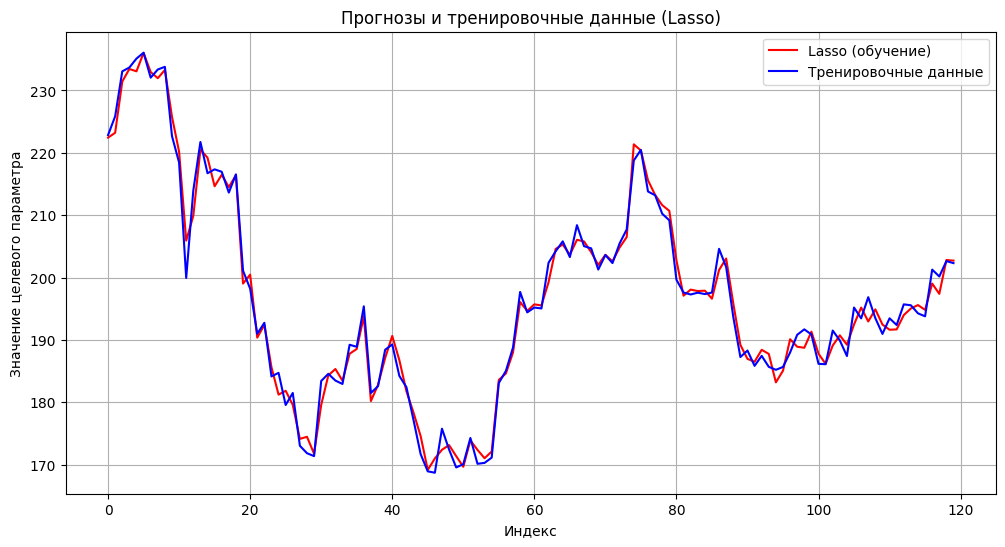

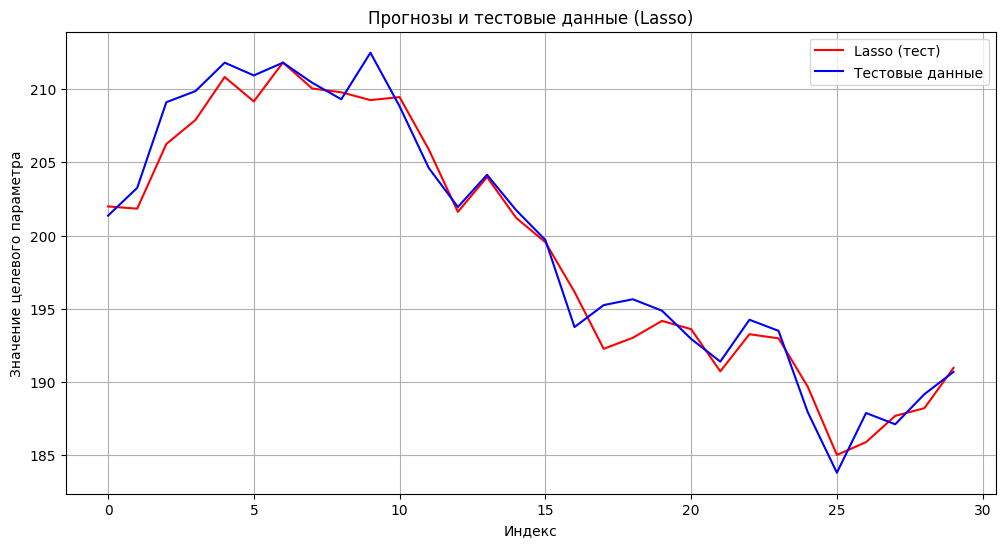

RMSE Lasso: 1.48


In [100]:
# Метод Lasso
lasso = Lasso()
lasso.fit(X_train, y_train)
y_lasso_train = lasso.predict(X_train)
y_lasso_test = lasso.predict(X_test)

# Построение графиков для Lasso
plt.figure(figsize=(12, 6))
plt.plot(y_lasso_train, label='Lasso (обучение)', color='red')
plt.plot(range(len(y_train)), y_train, label='Тренировочные данные', color='blue')
plt.xlabel('Индекс')
plt.ylabel('Значение целевого параметра')
plt.legend()
plt.title('Прогнозы и тренировочные данные (Lasso)')
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(y_lasso_test, label='Lasso (тест)', color='red')
plt.plot(range(len(y_test)), y_test, label='Тестовые данные', color='blue')
plt.xlabel('Индекс')
plt.ylabel('Значение целевого параметра')
plt.legend()
plt.title('Прогнозы и тестовые данные (Lasso)')
plt.grid(True)
plt.show()

# Расчет RMSE для Lasso
rmse_lasso = np.sqrt(mean_squared_error(y_test, y_lasso_test))
print(f'RMSE Lasso: {rmse_lasso:.2f}')

RMSE на обучающей выборке: 1.52
RMSE на тестовой выборке: 1.36


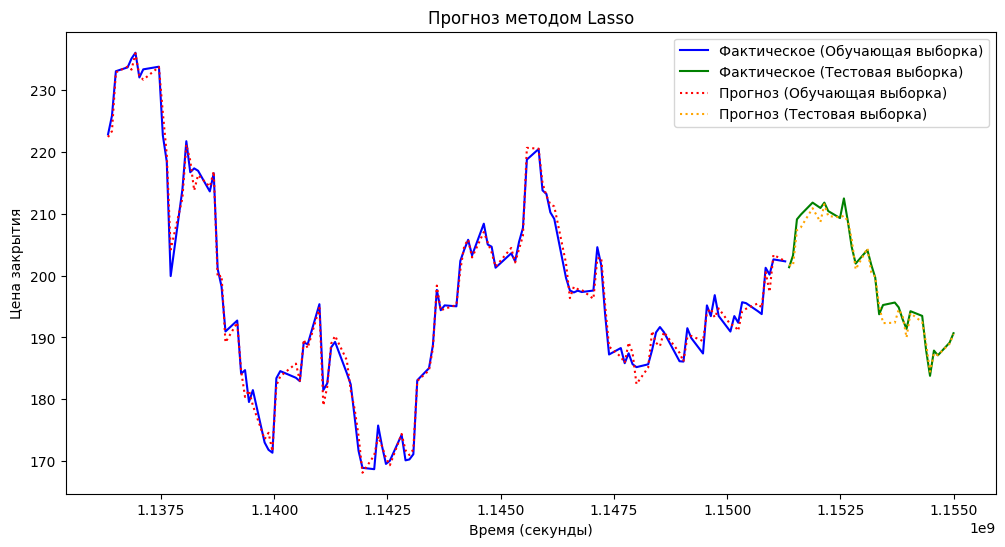

In [101]:
# Создание и обучение модели Lasso
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

lasso = Lasso(alpha=0.01)
lasso.fit(X_train_scaled, y_train)

# Прогноз на обучающих и тестовых данных
y_train_pred = lasso.predict(X_train_scaled)
y_test_pred = lasso.predict(X_test_scaled)

# Подсчет RMSE
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

# Вывод RMSE
print(f'RMSE на обучающей выборке: {rmse_train:.2f}')
print(f'RMSE на тестовой выборке: {rmse_test:.2f}')

# График прогнозов и фактических значений
plt.figure(figsize=(12, 6))
plt.plot(train_data['Timestamp'], y_train, label='Фактическое (Обучающая выборка)', color='blue')
plt.plot(test_data['Timestamp'], y_test, label='Фактическое (Тестовая выборка)', color='green')
plt.plot(train_data['Timestamp'], y_train_pred, label='Прогноз (Обучающая выборка)', color='red', linestyle='dotted')
plt.plot(test_data['Timestamp'], y_test_pred, label='Прогноз (Тестовая выборка)', color='orange', linestyle='dotted')
plt.xlabel('Время (секунды)')
plt.ylabel('Цена закрытия')
plt.legend()
plt.title('Прогноз методом Lasso')
plt.show()

Метод PLS (Partial Least Squares)
---

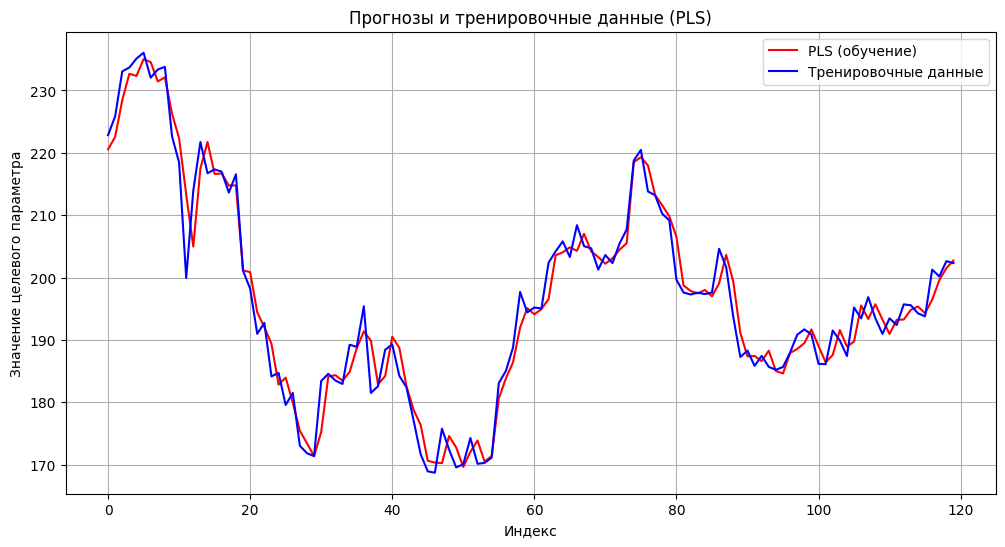

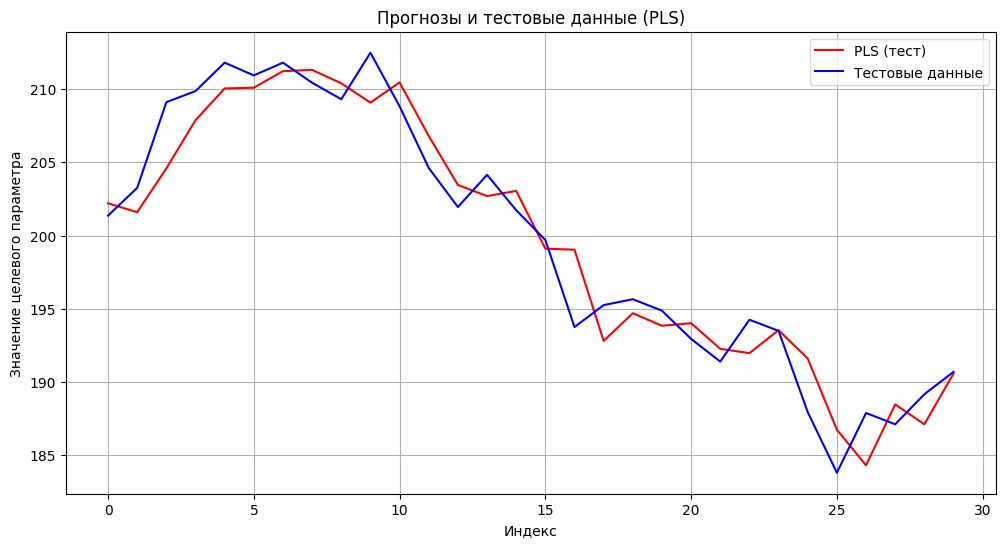

RMSE PLS: 2.19


In [102]:
# Метод PLS
pls = PLSRegression(n_components=1)
pls.fit(X_train, y_train)
y_pls_train = pls.predict(X_train)
y_pls_test = pls.predict(X_test)

# Построение графиков для PLS
plt.figure(figsize=(12, 6))
plt.plot(y_pls_train, label='PLS (обучение)', color='red')
plt.plot(range(len(y_train)), y_train, label='Тренировочные данные', color='blue')
plt.xlabel('Индекс')
plt.ylabel('Значение целевого параметра')
plt.legend()
plt.title('Прогнозы и тренировочные данные (PLS)')
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(y_pls_test, label='PLS (тест)', color='red')
plt.plot(range(len(y_test)), y_test, label='Тестовые данные', color='blue')
plt.xlabel('Индекс')
plt.ylabel('Значение целевого параметра')
plt.legend()
plt.title('Прогнозы и тестовые данные (PLS)')
plt.grid(True)
plt.show()

# Расчет RMSE для PLS
rmse_pls = np.sqrt(mean_squared_error(y_test, y_pls_test))
print(f'RMSE PLS: {rmse_pls:.2f}')

RMSE на обучающей выборке: 3.05
RMSE на тестовой выборке: 2.13


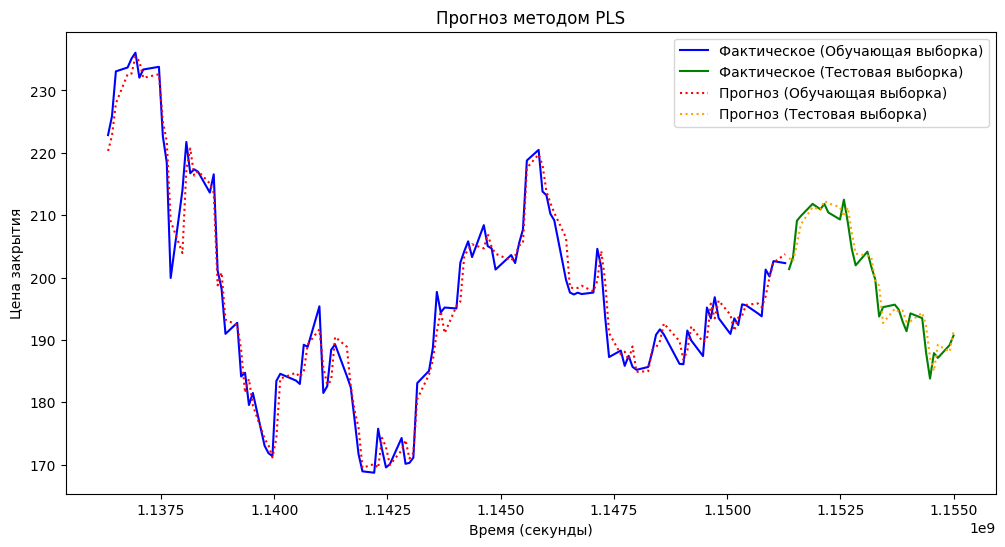

In [103]:
# Создание и обучение модели PLS
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

pls = PLSRegression(n_components=2)
pls.fit(X_train_scaled, y_train)

# Прогноз на обучающих и тестовых данных
y_train_pred = pls.predict(X_train_scaled)
y_test_pred = pls.predict(X_test_scaled)

# Подсчет RMSE
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

# Вывод RMSE
print(f'RMSE на обучающей выборке: {rmse_train:.2f}')
print(f'RMSE на тестовой выборке: {rmse_test:.2f}')

# График прогнозов и фактических значений
plt.figure(figsize=(12, 6))
plt.plot(train_data['Timestamp'], y_train, label='Фактическое (Обучающая выборка)', color='blue')
plt.plot(test_data['Timestamp'], y_test, label='Фактическое (Тестовая выборка)', color='green')
plt.plot(train_data['Timestamp'], y_train_pred, label='Прогноз (Обучающая выборка)', color='red', linestyle='dotted')
plt.plot(test_data['Timestamp'], y_test_pred, label='Прогноз (Тестовая выборка)', color='orange', linestyle='dotted')
plt.xlabel('Время (секунды)')
plt.ylabel('Цена закрытия')
plt.legend()
plt.title('Прогноз методом PLS')
plt.show()